# <font color='white'>**Seleção e agrupamento de dados com pandas**</font>

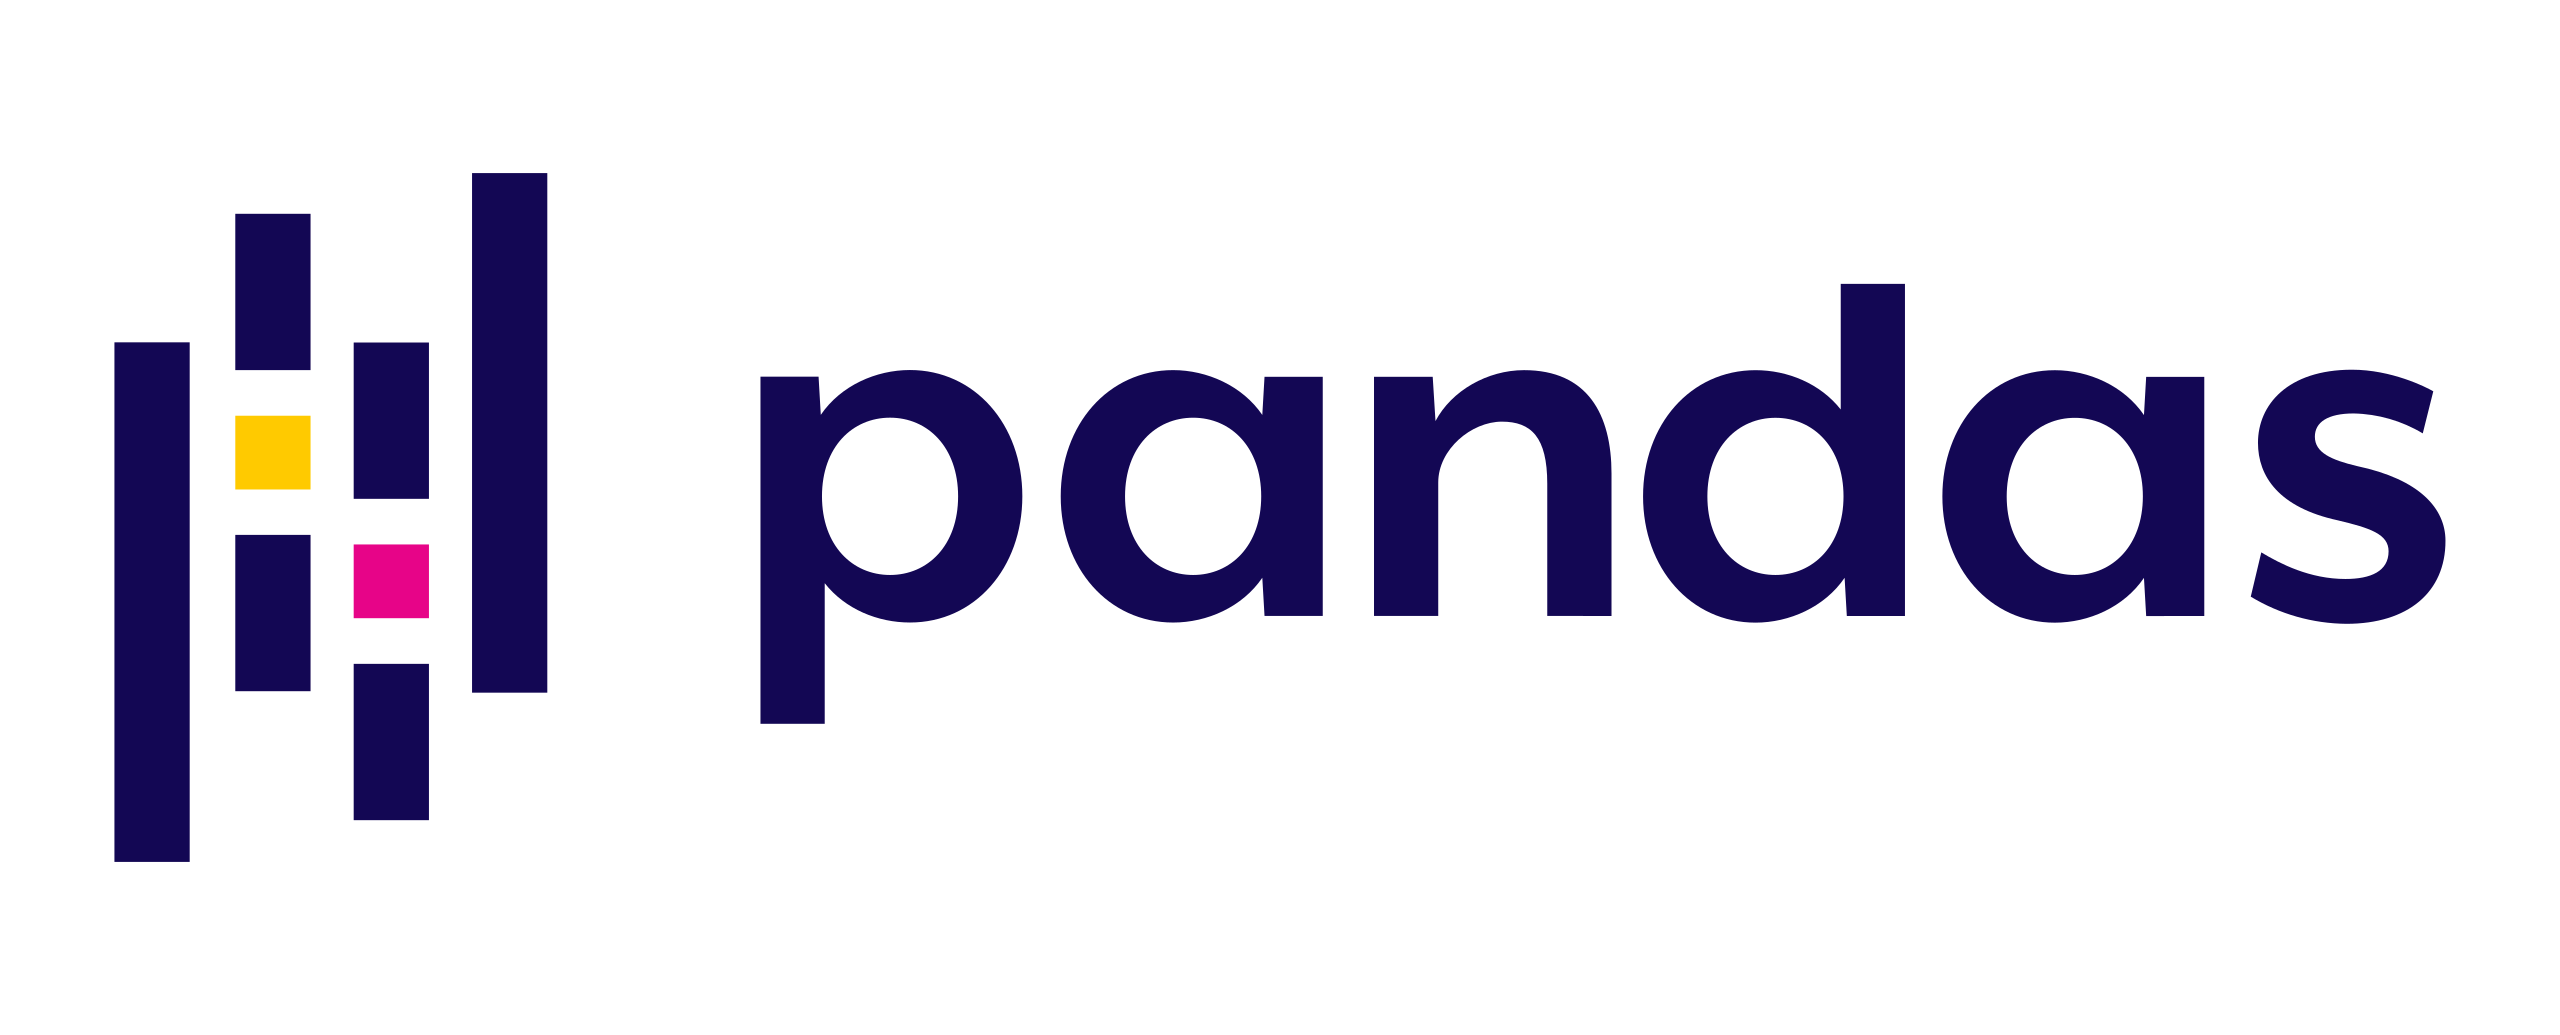

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Fazendo a leitura dos dados

Vamos analisar dados de emissões de gases de efeito estufa no território brasileiro e criar tabelas e visualizações para entender os dados e gerar insights a partir deles. Os dados foram extraídos do SEEG.

---
ℹ Fonte: SEEG - Sistema de Estimativa de Emissões e Remoções de Gases de Efeito Estufa, Observatório do Clima, acessado em http://seeg.eco.br:

- [Download da base de dados](https://docs.google.com/spreadsheets/d/1RyDrXRuodAzNbFRiCT2B2hBhTjPhbXPs/edit?usp=sharing&ouid=100910053853126437123&rtpof=true&sd=true)
---

Primeiramente, vamos importar a biblioteca [`pandas`](https://pandas.pydata.org/docs/index.html) e os dados que serão utilizados. Como os dados estão em um arquivo excel, vamos usar a função [`read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html).

In [154]:
import pandas as pd

In [155]:
emissoes_gases = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/1-SEEG10_GERAL-BR_UF_2022.10.27-FINAL-SITE.xlsx', sheet_name = 'GEE Estados')

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [156]:
emissoes_gases.head()

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,Emissão,COVNM (t),SP,OUTRA_IND,...,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600,897.600
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,N2O (t),SP,OUTRA_IND,...,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000,130.000
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO (t),SP,OUTRA_IND,...,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576,1380.576
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,NOx (t),SP,OUTRA_IND,...,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430,431.430
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,Emissão,CO2e (t) GWP-AR2,SP,OUTRA_IND,...,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000,40300.000


Vamos checar a estrutura do nosso DataFrame com o uso do método [`info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info), que retorna a quantidade de linhas e colunas, bem como a informação de quantidade de dados nulos e tipos de dados para cada uma das colunas.

In [157]:
emissoes_gases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 63 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Nível 1 - Setor             103312 non-null  object 
 1   Nível 2                     103312 non-null  object 
 2   Nível 3                     103253 non-null  object 
 3   Nível 4                     90920 non-null   object 
 4   Nível 5                     100788 non-null  object 
 5   Nível 6                     97691 non-null   object 
 6   Emissão / Remoção / Bunker  103312 non-null  object 
 7   Gás                         103312 non-null  object 
 8   Estado                      97374 non-null   object 
 9   Atividade Econômica         102076 non-null  object 
 10  Produto                     37413 non-null   object 
 11  1970                        103312 non-null  float64
 12  1971                        103312 non-null  float64
 13  1972          

### Ajustando a base de dados

Estamos interessados somente na emissão de gases gerados pelos estados que estejam no inventário nacional, portanto vamos identificar os tipos de dados únicos da coluna *`Emissão / Remoção / Bunker`* e logo após removê-los.

---
ℹ
- *Remoções são dados referentes à retirada dos gases estufa, que é o contrário da emissão de gases estufa.*
- *NCI são dados não contemplados no inventário nacional.*
- *Bunkers são emissões de transporte marítimo e aéreo internacional, portanto não são emissões diretas dos estados.*

*Informação disponível no site do SEEG.

---

In [158]:
emissoes_gases['Emissão / Remoção / Bunker'].unique()

array(['Emissão', 'Emissão NCI', 'Remoção NCI', 'Bunker', 'Remoção'],
      dtype=object)

Vamos checar primeiro os dados de remoção, para identificar se todos eles são de retirada de gases estufa.

In [159]:
(emissoes_gases['Emissão / Remoção / Bunker'] == 'Remoção NCI') | (emissoes_gases['Emissão / Remoção / Bunker'] == 'Remoção')

0         False
1         False
2         False
3         False
4         False
          ...  
103307    False
103308    False
103309    False
103310    False
103311    False
Name: Emissão / Remoção / Bunker, Length: 103312, dtype: bool

In [160]:
emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção'])]

,Nível 1 - Setor,Nível 2,Nível 3,Nível 4,Nível 5,Nível 6,Emissão / Remoção / Bunker,Gás,Estado,Atividade Econômica,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RO,PEC,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AC,PEC,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),AM,PEC,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),RR,PEC,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Pastagem Bem Manejada,Remoção NCI,CO2 (t),PA,PEC,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR4,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR5,MS,AGROPEC,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,Remoção,CO2e (t) GWP-AR6,MT,AGROPEC,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


Podemos usar o método [`.loc( )`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) para fazer a filtragem booleana:

In [161]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021]

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
23520,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.434540e+07,-1.499358e+07,-1.543196e+07,-1.567070e+07,-1.630063e+07,-1.702215e+07,-1.740074e+07,-1.771914e+07,-1.767632e+07,-1.838895e+07
23521,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-5.382949e+06,-5.524659e+06,-5.632429e+06,-5.765030e+06,-5.867354e+06,-5.942076e+06,-6.022000e+06,-6.002147e+06,-6.035591e+06,-6.459079e+06
23522,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.450455e+06,-3.540294e+06,-3.545724e+06,-3.924546e+06,-4.626541e+06,-4.874199e+06,-4.849173e+06,-4.959540e+06,-5.106806e+06,-5.809814e+06
23523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.260166e+06,-1.261895e+06,-1.371664e+06,-1.501452e+06,-1.507705e+06,-1.509919e+06,-1.609826e+06,-1.616980e+06,-1.518397e+06,-1.926000e+06
23524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.429279e+07,-3.317185e+07,-3.281628e+07,-3.350720e+07,-3.557183e+07,-3.755308e+07,-4.134614e+07,-4.229403e+07,-4.275448e+07,-4.443440e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102751,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04
102753,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.513000e+04,-7.911900e+04,-8.695900e+04,-9.201400e+04,-9.149400e+04,-9.630200e+04,-9.202000e+04,-9.762300e+04,-1.015020e+05,-1.008910e+05
102754,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.523000e+03,-9.667000e+03,-1.000300e+04,-1.024200e+04,-1.027200e+04,-1.019100e+04,-1.046900e+04,-1.090400e+04,-1.104100e+04,-1.109500e+04


Para identificar se todos os valores são negativos, vamos utilizar a função `max()` para checar se tem algum valor maior do que 0.

In [162]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'].isin(['Remoção NCI', 'Remoção']), 1970:2021].max()

1970    0.0
1971    0.0
1972    0.0
1973    0.0
1974    0.0
1975    0.0
1976    0.0
1977    0.0
1978    0.0
1979    0.0
1980    0.0
1981    0.0
1982    0.0
1983    0.0
1984    0.0
1985    0.0
1986    0.0
1987    0.0
1988    0.0
1989    0.0
1990    0.0
1991    0.0
1992    0.0
1993    0.0
1994    0.0
1995    0.0
1996    0.0
1997    0.0
1998    0.0
1999    0.0
2000    0.0
2001    0.0
2002    0.0
2003    0.0
2004    0.0
2005    0.0
2006    0.0
2007    0.0
2008    0.0
2009    0.0
2010    0.0
2011    0.0
2012    0.0
2013    0.0
2014    0.0
2015    0.0
2016    0.0
2017    0.0
2018    0.0
2019    0.0
2020    0.0
2021    0.0
dtype: float64

Vamos também identificar se algum valor do tipo *Bunker* corresponde a alguma emissão feita por algum estado.

In [163]:
emissoes_gases.loc[emissoes_gases['Emissão / Remoção / Bunker'] == 'Bunker','Estado'].unique()

array([nan], dtype=object)

Vamos remover todas as linhas que contenham **Emissão NCI** na coluna *Emissão / Remoção / Bunker*, visto que são dados não contemplados no inventário nacional.

In [164]:
emissoes_gases = emissoes_gases[emissoes_gases['Emissão / Remoção / Bunker'] != 'Emissão NCI']

Como não restou nenhum valor útil para análise na coluna de *Emissão / Remoção / Bunker*, vamos removê-la por completo da base de dados.

In [165]:
emissoes_gases = emissoes_gases.drop(columns = 'Emissão / Remoção / Bunker')

Vamos renomear as colunas de acordo com a documentação: *Tabela de Referencia para os Níveis Hierarquicos (Arvore de Setores e Subsetores)*, com o intuito de facilitar a análise dos dados.

In [166]:
emissoes_gases.rename({'Nível 1 - Setor':'Setor', 'Nível 2':'Processo Emissor', 'Nível 3':'Forma de Emissão', 'Nível 4':'Processo Específico', 'Nível 5':'Tipo de Atividade', 'Nível 6':'Atividade Específica'}, axis=1, inplace=True)

### Desafio 1

1. Encontre os valores únicos das colunas "Nível 1 - Setor" e "Estado" para identificar as atividades econômicas presentes na base de dados e se todos os Estados do Brasil estão presentes no DataFrame.

In [167]:
emissoes_gases['Setor'].unique()

array(['Processos Industriais', 'Agropecuária', 'Energia', 'Resíduos ',
       'Mudança de Uso da Terra e Floresta'], dtype=object)

In [168]:
emissoes_gases['Estado'].unique()

array(['SP', 'BA', 'RJ', 'MG', 'SE', 'PR', nan, 'RO', 'AM', 'PA', 'TO',
       'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'MT', 'MS', 'GO', 'DF',
       'ES', 'SC', 'RS', 'AC', 'AP', 'RR'], dtype=object)

Realizando o tratamento de dados `'Nan'` para `'NA'` de Não Alocado, conforme documentação.

In [169]:
emissoes_gases['Estado'].fillna('NA', inplace=True)

In [170]:
emissoes_gases['Estado'].unique()

array(['SP', 'BA', 'RJ', 'MG', 'SE', 'PR', 'NA', 'RO', 'AM', 'PA', 'TO',
       'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'MT', 'MS', 'GO', 'DF',
       'ES', 'SC', 'RS', 'AC', 'AP', 'RR'], dtype=object)

2. Filtre o DataFrame somente com os dados dos Estados da região Sul do Brasil.

In [171]:
emissoes_gases[
    emissoes_gases['Estado'].isin(['RS', 'SC', 'PR'])
    ]

,Setor,Processo Emissor,Forma de Emissão,Processo Específico,Tipo de Atividade,Atividade Específica,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
35,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2 (t),PR,OUTRA_IND,NaN,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
36,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2e (t) GWP-AR2,PR,OUTRA_IND,NaN,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
37,Processos Industriais,Indústria Química,Produção de Amônia,NaN,NaN,NaN,CO2e (t) GTP-AR2,PR,OUTRA_IND,NaN,...,4.562042e+05,4.682616e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05,5.151689e+05
110,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,CO2 (t),PR,CIM,NaN,...,2.012596e+06,2.212002e+06,2.241143e+06,2.176752e+06,2.279061e+06,2.115372e+06,2.173266e+06,2.230656e+06,2.488650e+06,2.845457e+06
111,Processos Industriais,Produtos Minerais,Produção de Cimento,NaN,NaN,NaN,CO2 (t),SC,CIM,NaN,...,7.126368e+05,6.421719e+05,8.163383e+05,6.769844e+05,5.272686e+05,5.143665e+05,5.130451e+05,5.451073e+05,6.144431e+05,7.179804e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103221,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,CO2e (t) GWP-AR2,RS,AGROPEC,NaN,...,1.108518e+06,1.479183e+06,9.718840e+05,9.948190e+05,7.698680e+05,9.057280e+05,9.238730e+05,1.046432e+06,1.439095e+06,1.432812e+06
103222,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,CO2e (t) GWP-AR4,RS,AGROPEC,NaN,...,1.196999e+06,1.599471e+06,1.045298e+06,1.070678e+06,8.308050e+05,9.748940e+05,9.924510e+05,1.124747e+06,1.543126e+06,1.541087e+06
103223,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,RS,AGROPEC,NaN,...,1.221927e+06,1.635136e+06,1.062603e+06,1.089187e+06,8.475340e+05,9.918540e+05,1.007627e+06,1.142614e+06,1.563684e+06,1.566694e+06
103224,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pampa,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,RS,AGROPEC,NaN,...,1.232994e+06,1.649637e+06,1.072887e+06,1.099601e+06,8.553060e+05,1.001321e+06,1.017557e+06,1.153771e+06,1.579514e+06,1.581831e+06


3. Filtre o DataFrame somente com os dados de "Mudança de Uso da Terra e Floresta" que sejam do Estado do Amazonas.

In [172]:
emissoes_gases[
    (emissoes_gases['Setor'] == 'Mudança de Uso da Terra e Floresta') & (emissoes_gases['Estado'] == 'AM')
    ]

,Setor,Processo Emissor,Forma de Emissão,Processo Específico,Tipo de Atividade,Atividade Específica,Gás,Estado,Atividade Econômica,Produto,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
81262,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2 (t),AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81271,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR2,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81280,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR4,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81289,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR5,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
81298,Mudança de Uso da Terra e Floresta,Alterações de Uso da Terra,Amazônia,fora de Área Protegida,Desmatamento,Floresta primária -- Área sem vegetação,CO2e (t) GTP-AR6,AM,AGROPEC,NaN,...,8.511800e+04,9.763700e+04,8.761900e+04,1.218150e+05,1.137590e+05,5.299800e+04,6.117000e+04,48264.0,14381.0,31867.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102803,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR2,AM,AGROPEC,NaN,...,2.239997e+06,3.186571e+06,2.973253e+06,4.796274e+06,7.396711e+06,4.362453e+06,4.434835e+06,7074966.0,8746520.0,8429758.0
102812,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR4,AM,AGROPEC,NaN,...,2.505953e+06,3.565317e+06,3.330733e+06,5.368844e+06,8.276064e+06,4.888099e+06,4.967871e+06,7929733.0,9799770.0,9408067.0
102821,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,AM,AGROPEC,NaN,...,2.651128e+06,3.772286e+06,3.528292e+06,5.683071e+06,8.756712e+06,5.179207e+06,5.262358e+06,8404321.0,10382705.0,9929881.0
102830,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Amazônia,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,AM,AGROPEC,NaN,...,2.661898e+06,3.787545e+06,3.541992e+06,5.705721e+06,8.792123e+06,5.199159e+06,5.282817e+06,8436366.0,10422789.0,9973416.0


4. Encontre o valor máximo de emissão do ano de 2021 para os dados de "Agropecuária" no Estado do Pará.

In [173]:
emissoes_gases.loc[
    (emissoes_gases['Setor'] == 'Agropecuária')
    & (emissoes_gases['Estado'] == 'PA'), 2021
    ].max()

36856969.7986

### Modificando o formato do DataFrame

Para realizar as agregações nos dados de emissão, é necessário que a base de dados esteja em um formato adequado, com os valores de emissão todos em uma mesma coluna. Para isso, devemos modificar o formato da base de dados de forma que as colunas referentes a cada ano se tornem uma só coluna.

In [174]:
# salvando variavel com o filtro das colunas que iremos manter

colunas_info = list(emissoes_gases.loc[:, 'Setor':'Produto'].columns)
colunas_info

['Setor',
 'Processo Emissor',
 'Forma de Emissão',
 'Processo Específico',
 'Tipo de Atividade',
 'Atividade Específica',
 'Gás',
 'Estado',
 'Atividade Econômica',
 'Produto']

Vamos renomear as colunas de acordo com a documentação: *Tabela de Referencia para os Níveis Hierarquicos (Arvore de Setores e Subsetores)*, com o intuito de facilitar a análise dos dados.

In [175]:
# salvando variavel com o filtro das colunas para modificar

colunas_emissao = list(emissoes_gases.loc[:,1970:2021].columns)
colunas_emissao

[1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 2021]

Para realizar a transformação do DataFrame, utilizamos o método [`melt()`](https://pandas.pydata.org/docs/reference/api/pandas.melt.html). Esse método tem o intuito de transformar um DataFrame de um formato amplo (*wide*) para o formato longo (*long*).

Sintaxe melt:
`dataframe.melt(id_vars = [...], value_vars = [...], var_name = '..', value_name = '..')`

O parâmetro id_vars é utilizado para identificar os nomes das colunas que serão mantidas no momento da transformação. Já o parâmetro value_vars é utilizado para identificar as colunas que serão transformadas nas colunas principais do formato long, uma contendo as categorias com os nomes das colunas e outra contendo os valores. O parâmetro var_name é usado para nomear a coluna contendo as categorias e o parâmetro value_name para nomear a coluna com os valores numéricos.


*Para conhecimento, excluir do portfolio*

In [176]:
emissoes_gases.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano' , value_name = 'Emissão')

,Setor,Processo Emissor,Forma de Emissão,Processo Específico,Tipo de Atividade,Atividade Específica,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
0,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1970,0.0
1,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1970,6210.0
2,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1970,368.0
3,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1970,115.0
4,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1970,1925100.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5343515,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.0
5343516,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.0
5343517,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.0
5343518,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.0


In [177]:
emissoes_por_ano = emissoes_gases.melt(id_vars = colunas_info, value_vars = colunas_emissao, var_name = 'Ano' , value_name = 'Emissão')

Faremos agora a limpeza das linhas nos anos de 1970 a 1990, visto que as coletas de Mudança de Uso da Terra passaram a ser coletadas a partir do mesmo. Tornando os dados não comparáveis com o período de 1990 a 2021.



**Informação presente na documentação.*

In [178]:
emissoes_por_ano['Ano'] = emissoes_por_ano['Ano'].astype(int)

In [179]:
emissoes_por_ano = emissoes_por_ano[~((emissoes_por_ano['Ano'] >= 1970) & (emissoes_por_ano['Ano'] < 1990))]

emissoes_por_ano

,Setor,Processo Emissor,Forma de Emissão,Processo Específico,Tipo de Atividade,Atividade Específica,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
2055200,Processos Industriais,Indústria Química,Produção de ABS,NaN,NaN,NaN,COVNM (t),SP,OUTRA_IND,NaN,1990,734.400
2055201,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,N2O (t),SP,OUTRA_IND,NaN,1990,8630.000
2055202,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO (t),SP,OUTRA_IND,NaN,1990,511.216
2055203,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,NOx (t),SP,OUTRA_IND,NaN,1990,159.755
2055204,Processos Industriais,Indústria Química,Produção de Ácido Adípico,NaN,NaN,NaN,CO2e (t) GWP-AR2,SP,OUTRA_IND,NaN,1990,2675300.000
...,...,...,...,...,...,...,...,...,...,...,...,...
5343515,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR5,MS,AGROPEC,NaN,2021,1004191.000
5343516,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MT,AGROPEC,NaN,2021,443120.000
5343517,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,CO2e (t) GWP-AR6,MS,AGROPEC,NaN,2021,1009968.000
5343518,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,NaN,Desmatamento,NaN,N2O (t),MT,AGROPEC,NaN,2021,479.000


In [180]:
emissoes_por_ano.fillna(value='', inplace=True)
emissoes_por_ano

# tratamento dos dados NaN

,Setor,Processo Emissor,Forma de Emissão,Processo Específico,Tipo de Atividade,Atividade Específica,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
2055200,Processos Industriais,Indústria Química,Produção de ABS,,,,COVNM (t),SP,OUTRA_IND,,1990,734.400
2055201,Processos Industriais,Indústria Química,Produção de Ácido Adípico,,,,N2O (t),SP,OUTRA_IND,,1990,8630.000
2055202,Processos Industriais,Indústria Química,Produção de Ácido Adípico,,,,CO (t),SP,OUTRA_IND,,1990,511.216
2055203,Processos Industriais,Indústria Química,Produção de Ácido Adípico,,,,NOx (t),SP,OUTRA_IND,,1990,159.755
2055204,Processos Industriais,Indústria Química,Produção de Ácido Adípico,,,,CO2e (t) GWP-AR2,SP,OUTRA_IND,,1990,2675300.000
...,...,...,...,...,...,...,...,...,...,...,...,...
5343515,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,,Desmatamento,,CO2e (t) GWP-AR5,MS,AGROPEC,,2021,1004191.000
5343516,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,,Desmatamento,,CO2e (t) GWP-AR6,MT,AGROPEC,,2021,443120.000
5343517,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,,Desmatamento,,CO2e (t) GWP-AR6,MS,AGROPEC,,2021,1009968.000
5343518,Mudança de Uso da Terra e Floresta,Resíduos Florestais,Pantanal,,Desmatamento,,N2O (t),MT,AGROPEC,,2021,479.000


### Análise dos gases

Vamos fazer uma análise agora da quantidade de emissão **total** por tipo de gás. Para isso, vamos realizar um agrupamento dos dados com a função [`groupby()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html).


In [181]:
emissoes_por_ano.groupby('Gás')

Podemos checar quais dados foram agrupados em cada grupo com uso do atributo [`groups`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.groups.html) e realizar seleções de grupos específicos com o método [`get_group()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.GroupBy.get_group.html).

In [182]:
emissoes_por_ano.groupby('Gás').groups

# Retorna um dic onde as chaves são os grupos e os valores são os índices das linhas do df que pertencem a cada grupo.

{'C2F6 (t)': [2055610, 2055611, 2055612, 2055625, 2055626, 2055627, 2158370, 2158371, 2158372, 2158385, 2158386, 2158387, 2261130, 2261131, 2261132, 2261145, 2261146, 2261147, 2363890, 2363891, 2363892, 2363905, 2363906, 2363907, 2466650, 2466651, 2466652, 2466665, 2466666, 2466667, 2569410, 2569411, 2569412, 2569425, 2569426, 2569427, 2672170, 2672171, 2672172, 2672185, 2672186, 2672187, 2774930, 2774931, 2774932, 2774945, 2774946, 2774947, 2877690, 2877691, 2877692, 2877705, 2877706, 2877707, 2980450, 2980451, 2980452, 2980465, 2980466, 2980467, 3083210, 3083211, 3083212, 3083225, 3083226, 3083227, 3185970, 3185971, 3185972, 3185985, 3185986, 3185987, 3288730, 3288731, 3288732, 3288745, 3288746, 3288747, 3391490, 3391491, 3391492, 3391505, 3391506, 3391507, 3494250, 3494251, 3494252, 3494265, 3494266, 3494267, 3597010, 3597011, 3597012, 3597025, 3597026, 3597027, 3699770, 3699771, 3699772, 3699785, ...], 'CF4 (t)': [2055607, 2055608, 2055609, 2055622, 2055623, 2055624, 2158367, 21583

In [183]:
emissoes_por_ano.groupby('Gás').get_group('CO2 (t)')

,Setor,Processo Emissor,Forma de Emissão,Processo Específico,Tipo de Atividade,Atividade Específica,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
2055218,Processos Industriais,Indústria Química,Produção de Acrilonitrila,,,,CO2 (t),BA,OUTRA_IND,,1990,1.813500e+04
2055223,Processos Industriais,Indústria Química,Produção de Amônia,,,,CO2 (t),RJ,OUTRA_IND,,1990,5.578581e+03
2055226,Processos Industriais,Indústria Química,Produção de Amônia,,,,CO2 (t),MG,OUTRA_IND,,1990,1.218375e+04
2055229,Processos Industriais,Indústria Química,Produção de Amônia,,,,CO2 (t),BA,OUTRA_IND,,1990,6.404559e+05
2055232,Processos Industriais,Indústria Química,Produção de Amônia,,,,CO2 (t),SE,OUTRA_IND,,1990,3.005815e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
5342977,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,fora de Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,CO2 (t),MS,AGROPEC,,2021,-2.407667e+06
5342994,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Floresta secundária -- Floresta secundária,CO2 (t),MT,AGROPEC,,2021,-3.225300e+04
5342995,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Floresta secundária -- Floresta secundária,CO2 (t),MS,AGROPEC,,2021,-2.823030e+05
5343012,Mudança de Uso da Terra e Floresta,Remoção por Vegetação Secundária,Pantanal,em Área Protegida,Vegetação nativa estável,Vegetação não florestal secundária -- Vegetaçã...,CO2 (t),MT,AGROPEC,,2021,-1.109500e+04


Os métodos de agregação possíveis com a utilização do `groupby()`são os seguintes:
- `count()` para realizar contagem
- `sum()` para soma
- `mean()` para a média
- `median()` para a mediana
- `min()` para o valor mínimo
- `max()` para o valor máximo
- `std()` para o desvio-padrão
- `var()` para a variância

Ao invés de especificar a coluna, poder ser usado o `.sum(numeric_only=True)`

In [184]:
emissoes_por_ano.groupby('Gás')[['Emissão']].sum()

,Emissão
Gás,
C2F6 (t),3.909682e+02
CF4 (t),4.715039e+03
CH4 (t),5.957288e+08
CO (t),3.006381e+08
CO2 (t),2.758893e+10
CO2e (t) GTP-AR2,3.537561e+10
CO2e (t) GTP-AR4,3.537561e+10
CO2e (t) GTP-AR5,3.414236e+10
CO2e (t) GTP-AR6,3.465250e+10


In [185]:
emissoes_por_gas = emissoes_por_ano.groupby('Gás')[['Emissão']].sum().sort_values('Emissão', ascending=False)
emissoes_por_gas

,Emissão
Gás,
CO2e (t) GWP-AR5,4.919719e+10
CO2e (t) GWP-AR6,4.885379e+10
CO2e (t) GWP-AR4,4.796909e+10
CO2e (t) GWP-AR2,4.575362e+10
CO2e (t) GTP-AR2,3.537561e+10
CO2e (t) GTP-AR4,3.537561e+10
CO2e (t) GTP-AR6,3.465250e+10
CO2e (t) GTP-AR5,3.414236e+10
CO2 (t),2.758893e+10


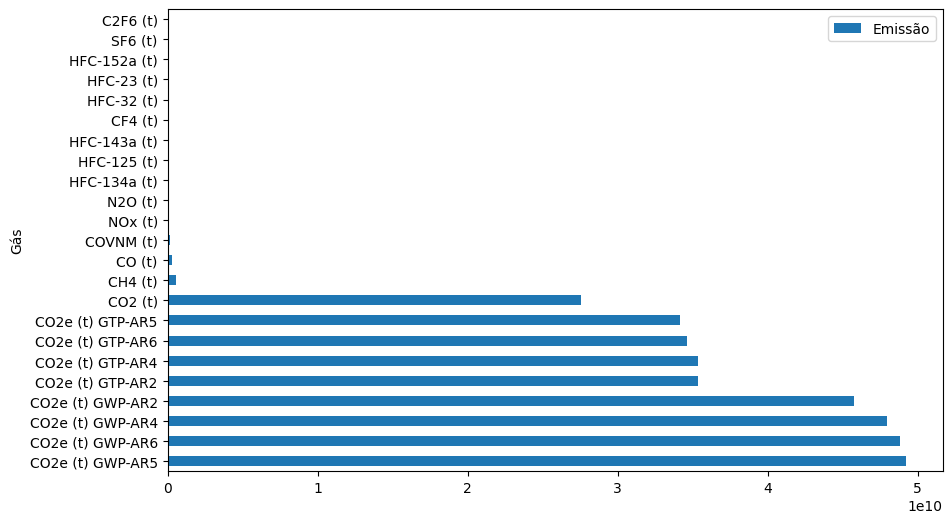

In [186]:
emissoes_por_gas.plot(kind='barh', figsize = (10,6));

In [187]:
emissoes_por_gas.iloc[0:9]

,Emissão
Gás,
CO2e (t) GWP-AR5,4.919719e+10
CO2e (t) GWP-AR6,4.885379e+10
CO2e (t) GWP-AR4,4.796909e+10
CO2e (t) GWP-AR2,4.575362e+10
CO2e (t) GTP-AR2,3.537561e+10
CO2e (t) GTP-AR4,3.537561e+10
CO2e (t) GTP-AR6,3.465250e+10
CO2e (t) GTP-AR5,3.414236e+10
CO2 (t),2.758893e+10


In [188]:
print(f'A emissão de CO2 corresponde a {float((emissoes_por_gas.iloc[0:9].sum()/emissoes_por_gas.sum()).iloc[0])*100:.2f}% de emissão total de gases estufa no Brasil de 1990 a 2021.')

A emissão de CO2 corresponde a 99.68% de emissão total de gases estufa no Brasil de 1990 a 2021.


*Agora, vamos pegar essa soma de emissão de gás carbônico e dividir pela emissão total de todos os gases. Dessa forma, teremos a porcentagem de emissão de CO₂ em relação aos demais gases.*

Vamos colocar esse cálculo em um `print()` para devolver a informação em texto para a equipe de supervisão.

Em uma nova célula, vamos escrever `print()`. Entre parênteses, escrevemos o f para concatenar a string A emissão de CO2 corresponde a com o resultado entre chaves da operação que vamos escrever. A operação será a soma da emissão de CO₂ dividida pela soma da emissão de todos os gases.

Primeiro, entre chaves, vamos escrever `float()`, pois queremos transformar o valor da operação em` float (valor decimal)`. Entre os parênteses de `float()`, digitamos a operação.

Será a `emissao_por_gas.iloc[0:9]` para selecionar a emissão de todos os gases do tipo CO₂. Depois do `.iloc`, colocamos o método de soma `.sum()`.

Em seguida, adicionamos uma barra para fazer a divisão. Agora, vamos colocar a soma de emissão de todos os gases, que será a tabela emissao_por_gas seguida do método `sum()` sem a seleção de nenhum dado.

A divisão irá nos trazer uma series que será um array. A partir dessa array, selecionaremos somente o primeiro dado, então vamos acrescentar `.iloc[0]` após o método `sum()`.

Por fim, fora do float, vamos multiplicar esse valor por cem e colocar apenas duas casas decimais. Para isso, digitamos o símbolo de asterisco, seguido do número 100, dois-pontos e `.2f`.


- *Explicação somente do código.*

### Desafio 2

1. Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para visualizar o dicionário contendo as chaves de grupos formados e a lista de índices de cada grupo.

In [189]:
emissoes_por_ano.groupby('Setor').groups

{'Agropecuária': [2056337, 2056338, 2056339, 2056340, 2056341, 2056342, 2056343, 2056344, 2056345, 2056346, 2056347, 2056348, 2056349, 2056350, 2056351, 2056352, 2056353, 2056354, 2056355, 2056356, 2056357, 2056358, 2056359, 2056360, 2056361, 2056362, 2056363, 2056364, 2056365, 2056366, 2056367, 2056368, 2056369, 2056370, 2056371, 2056372, 2056373, 2056374, 2056375, 2056376, 2056377, 2056378, 2056379, 2056380, 2056381, 2056382, 2056383, 2056384, 2056385, 2056386, 2056387, 2056388, 2056389, 2056390, 2056391, 2056392, 2056393, 2056394, 2056395, 2056396, 2056397, 2056398, 2056399, 2056400, 2056401, 2056402, 2056403, 2056404, 2056405, 2056406, 2056407, 2056408, 2056409, 2056410, 2056411, 2056412, 2056413, 2056414, 2056415, 2056416, 2056417, 2056418, 2056419, 2056420, 2056421, 2056422, 2056423, 2056424, 2056425, 2056426, 2056427, 2056428, 2056429, 2056430, 2056431, 2056432, 2056433, 2056434, 2056435, 2056436, ...], 'Energia': [2079449, 2079450, 2079451, 2079452, 2079453, 2079454, 2079455, 2

2. Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" e localize os dados do grupo "Agropecuária".

In [190]:
emissoes_por_ano.groupby('Setor').get_group('Agropecuária')

,Setor,Processo Emissor,Forma de Emissão,Processo Específico,Tipo de Atividade,Atividade Específica,Gás,Estado,Atividade Econômica,Produto,Ano,Emissão
2056337,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AC,AGR,ALIM_BEBIDAS,1990,0.000000e+00
2056338,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AL,AGR,ALIM_BEBIDAS,1990,2.032800e+03
2056339,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AM,AGR,ALIM_BEBIDAS,1990,0.000000e+00
2056340,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),AP,AGR,ALIM_BEBIDAS,1990,0.000000e+00
2056341,Agropecuária,Cultivo de Arroz,Diretas,Outros,Vegetal,Arroz,CH4 (t),BA,AGR,ALIM_BEBIDAS,1990,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...
5265004,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Lavouras Cultivadas sob Sistema Plantio Direto,CO2e (t) GTP-AR6,RS,AGR,ALIM_BEBIDAS,2021,-1.236554e+07
5265005,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Lavouras Cultivadas sob Sistema Plantio Direto,CO2e (t) GTP-AR6,MS,AGR,ALIM_BEBIDAS,2021,-4.807660e+06
5265006,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Lavouras Cultivadas sob Sistema Plantio Direto,CO2e (t) GTP-AR6,MT,AGR,ALIM_BEBIDAS,2021,-1.662099e+07
5265007,Agropecuária,Solos Manejados,Diretas,Variação dos Estoques de Carbono no Solo,Vegetal,Lavouras Cultivadas sob Sistema Plantio Direto,CO2e (t) GTP-AR6,GO,AGR,ALIM_BEBIDAS,2021,-6.411860e+06


3. Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para identificar a média de emissão de cada atividade econômica no ano de 2021.

In [191]:
emissoes_por_ano[emissoes_por_ano['Ano']==2021].groupby('Setor')[['Emissão']].mean().sort_values('Emissão', ascending=False)

,Emissão
Setor,
Processos Industriais,787101.255789
Mudança de Uso da Terra e Floresta,197434.311380
Resíduos,106106.723386
Energia,75120.049185
Agropecuária,-30695.561599


4. Faça um agrupamento de dados com base na coluna "Nível 1 - Setor" para identificar a soma de emissão de cada atividade econômica. Ordene os dados da maior para menor emissão.

In [192]:
emissoes_por_ano.groupby('Setor')[['Emissão']].sum().sort_values('Emissão', ascending=False)

,Emissão
Setor,
Mudança de Uso da Terra e Floresta,2.235738e+11
Energia,9.598383e+10
Processos Industriais,2.253016e+10
Agropecuária,9.235766e+09
Resíduos,8.726852e+09


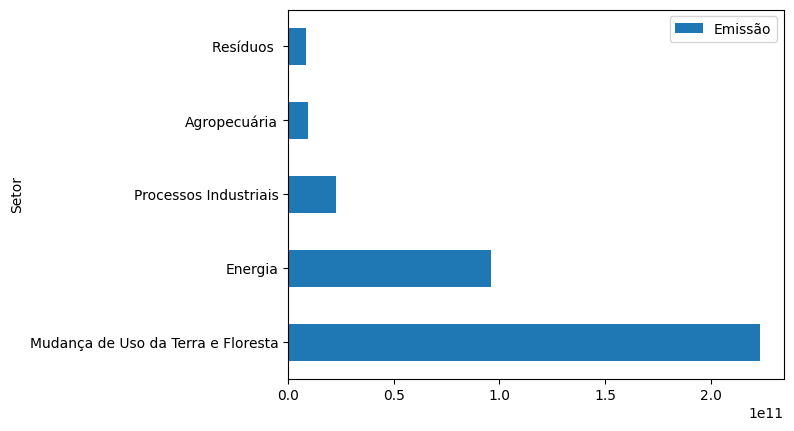

In [193]:
emissoes_por_ano.groupby('Setor')[['Emissão']].sum().sort_values('Emissão', ascending=False).plot(kind='barh');

### Emissão de gases por setor

Agora vamos em busca de duas informações:

- Descobrir quais são os setores mais poluentes para cada gás;
- Descobrir quais são os gases mais poluentes para cada setor.

In [194]:
gas_por_setor = emissoes_por_ano.groupby(['Gás','Setor'])[['Emissão']].sum()
gas_por_setor

Emissão
Gás      Setor                                           
C2F6 (t) Processos Industriais               3.909682e+02
CF4 (t)  Processos Industriais               4.715039e+03
CH4 (t)  Agropecuária                        4.227825e+08
         Energia                             1.779982e+07
         Mudança de Uso da Terra e Floresta  8.662166e+07
...                                                   ...
N2O (t)  Resíduos                            2.138717e+05
NOx (t)  Agropecuária                        1.779044e+06
         Energia                             7.794655e+07
         Processos Industriais               2.793933e+06
SF6 (t)  Processos Industriais               4.705800e+02

[72 rows x 1 columns]

In [195]:
gas_por_setor.loc['CH4 (t)']

,Emissão
Setor,
Agropecuária,4.227825e+08
Energia,1.779982e+07
Mudança de Uso da Terra e Floresta,8.662166e+07
Processos Industriais,1.497083e+06
Resíduos,6.702770e+07


In [196]:
gas_por_setor.loc[('CH4 (t)', 'Agropecuária')]

Emissão    4.227825e+08
Name: (CH4 (t), Agropecuária), dtype: float64

Para descobrir o setor que emite a maior quantidade de CO2, podemos realizar uma seleção específica do gás CO2 com o uso do método *cross-section* [`xs()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.xs.html), extraindo a partir disso o valor máximo e índice máximo com os métodos [`max()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.max.html) e [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.idxmax.html?highlight=idxmax#pandas.DataFrame.idxmax).

In [197]:
gas_por_setor.xs('CO2 (t)', level=0)

,Emissão
Setor,
Agropecuária,-7.809950e+09
Energia,1.019714e+10
Mudança de Uso da Terra e Floresta,2.301536e+10
Processos Industriais,2.166849e+09
Resíduos,1.953790e+07


In [198]:
gas_por_setor.xs(('CO2 (t)', 'Mudança de Uso da Terra e Floresta'), level=[0,1])

,,Emissão
Gás,Setor,
CO2 (t),Mudança de Uso da Terra e Floresta,2.301536e+10


In [199]:
gas_por_setor.xs('CO2 (t)', level=0).max()

Emissão    2.301536e+10
dtype: float64

In [200]:
gas_por_setor.xs('CO2 (t)', level=0).idxmax()

Emissão    Mudança de Uso da Terra e Floresta
dtype: object

Para evitar uma forma manual para cada tipo de gás, podemos explorar ainda mais o método `groupby()` em conjunto com o [`idxmax()`](https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.idxmax.html?highlight=idxmax#pandas.core.groupby.DataFrameGroupBy.idxmax).

In [201]:
gas_por_setor.groupby(level=0).idxmax()

# Para cada gás, temos a atividade econômica que mais emite aquele gás.
# indice que possui a maior emissão

,Emissão
Gás,
C2F6 (t),"(C2F6 (t), Processos Industriais)"
CF4 (t),"(CF4 (t), Processos Industriais)"
CH4 (t),"(CH4 (t), Agropecuária)"
CO (t),"(CO (t), Energia)"
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)"
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F..."
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F..."


Por fim, podemos criar uma tabela sumarizada com as informações dos valores máximos de emissão para cada tipo de gás e com a referência do setor com maior emissão de cada gás.

In [202]:
gas_por_setor.groupby(level=0).max()

,Emissão
Gás,
C2F6 (t),3.909682e+02
CF4 (t),4.715039e+03
CH4 (t),4.227825e+08
CO (t),2.216787e+08
CO2 (t),2.301536e+10
CO2e (t) GTP-AR2,2.417650e+10
CO2e (t) GTP-AR4,2.417650e+10
CO2e (t) GTP-AR5,2.399281e+10
CO2e (t) GTP-AR6,2.410965e+10


In [203]:
valores_max = gas_por_setor.groupby(level=0).max().values

In [204]:
tabela_sumarizada = gas_por_setor.groupby(level=0).idxmax()
tabela_sumarizada.insert(1, 'Quantidade de emissão', valores_max)
tabela_sumarizada

,Emissão,Quantidade de emissão
Gás,,
C2F6 (t),"(C2F6 (t), Processos Industriais)",3.909682e+02
CF4 (t),"(CF4 (t), Processos Industriais)",4.715039e+03
CH4 (t),"(CH4 (t), Agropecuária)",4.227825e+08
CO (t),"(CO (t), Energia)",2.216787e+08
CO2 (t),"(CO2 (t), Mudança de Uso da Terra e Floresta)",2.301536e+10
CO2e (t) GTP-AR2,"(CO2e (t) GTP-AR2, Mudança de Uso da Terra e F...",2.417650e+10
CO2e (t) GTP-AR4,"(CO2e (t) GTP-AR4, Mudança de Uso da Terra e F...",2.417650e+10
CO2e (t) GTP-AR5,"(CO2e (t) GTP-AR5, Mudança de Uso da Terra e F...",2.399281e+10
CO2e (t) GTP-AR6,"(CO2e (t) GTP-AR6, Mudança de Uso da Terra e F...",2.410965e+10


Obtemos a tabela sumarizada, temos as informações de cada gás, a atividade econômica que mais emite o gás e qual a quantidade de emissão.

Podemos alterar a ordem dos níveis de índice para encontrar a outra informação, que nos diz qual o gás mais emitido para cada tipo de setor. Para isso, vamos utilizar o método [`swaplevel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.swaplevel.html).

In [205]:
gas_por_setor.swaplevel(0,1)

Emissão
Setor                              Gás                   
Processos Industriais              C2F6 (t)  3.909682e+02
                                   CF4 (t)   4.715039e+03
Agropecuária                       CH4 (t)   4.227825e+08
Energia                            CH4 (t)   1.779982e+07
Mudança de Uso da Terra e Floresta CH4 (t)   8.662166e+07
...                                                   ...
Resíduos                           N2O (t)   2.138717e+05
Agropecuária                       NOx (t)   1.779044e+06
Energia                            NOx (t)   7.794655e+07
Processos Industriais              NOx (t)   2.793933e+06
                                   SF6 (t)   4.705800e+02

[72 rows x 1 columns]

In [206]:
gas_por_setor.swaplevel(0,1).groupby(level=0).idxmax()

,Emissão
Setor,
Agropecuária,"(Agropecuária, CO2e (t) GWP-AR5)"
Energia,"(Energia, CO2e (t) GWP-AR6)"
Mudança de Uso da Terra e Floresta,"(Mudança de Uso da Terra e Floresta, CO2e (t) ..."
Processos Industriais,"(Processos Industriais, CO2e (t) GWP-AR6)"
Resíduos,"(Resíduos , CO2e (t) GWP-AR5)"


Temos os gases que mais emitem para cada atividade. Como o CO2 é gás que emite uma maior quantidade, tivemos como retorno somente esse gás. Assim, cada atividade econômica terá um tipo de gás CO2 que mais emite.

Na agropecuária, por exemplo, emite o GWP-AR5. Sendo o tipo de CO2 que mais emite na agropecuária.

### Emissão ao longo dos anos

Vamos identificar se as emissões de gases estufas aumentaram ou diminuíram ao longo dos anos e visualizar essa variação para cada tipo de gás emitido separadamente.

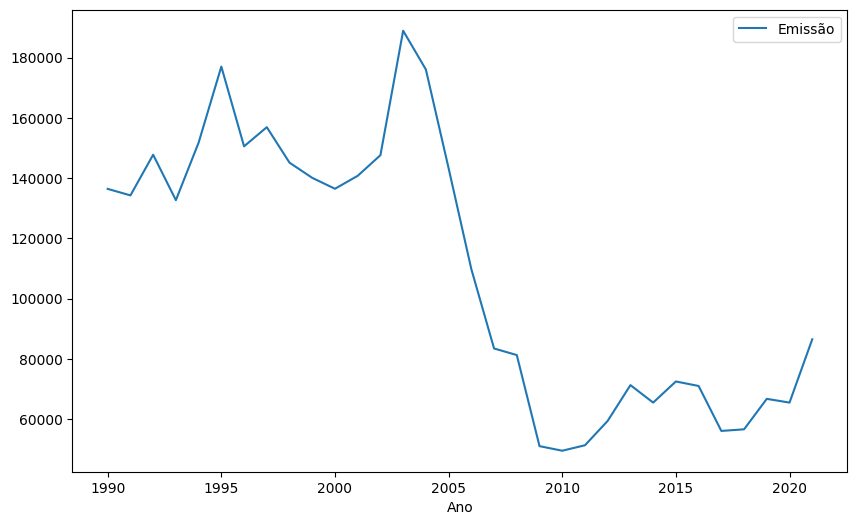

In [207]:
emissoes_por_ano.groupby('Ano')[['Emissão']].mean().plot(figsize=(10,6));

De 1990 até por volta de 2000, tivemos um crescimento da média de emissão, mas a partir de 2000 houve um decrescimento significativo até 2010 e posteriormente voltou a aumentar até o ano de 2020.


In [208]:
emissoes_por_ano.groupby('Ano')[['Emissão']].mean().idxmax()

# Indica que o ano com a maior média de emissão foi 2003. Foi o pico do gráfico.

Emissão    2003
dtype: int64

In [209]:
emissoes_por_ano.groupby(['Ano','Gás'])[['Emissão']].mean()

Emissão
Ano  Gás                      
1990 C2F6 (t)         4.424311
     CF4 (t)         50.974299
     CH4 (t)       3138.683181
     CO (t)        3111.793795
     CO2 (t)     225547.523947
...                        ...
2021 HFC-23 (t)       0.000000
     HFC-32 (t)     261.100000
     N2O (t)        119.293253
     NOx (t)        744.579232
     SF6 (t)          5.240000

[736 rows x 1 columns]

In [210]:
media_emissao_anual = emissoes_por_ano.groupby(['Ano','Gás'])[['Emissão']].mean().reset_index()
media_emissao_anual

,Ano,Gás,Emissão
0,1990,C2F6 (t),4.424311
1,1990,CF4 (t),50.974299
2,1990,CH4 (t),3138.683181
3,1990,CO (t),3111.793795
4,1990,CO2 (t),225547.523947
...,...,...,...
731,2021,HFC-23 (t),0.000000
732,2021,HFC-32 (t),261.100000
733,2021,N2O (t),119.293253
734,2021,NOx (t),744.579232


In [211]:
media_emissao_anual = media_emissao_anual.pivot_table(index = 'Ano', columns = 'Gás', values = 'Emissão')
media_emissao_anual

# Temos a informação do índice como cada ano, enquanto cada coluna corresponde a um gás. Com isso, obtemos a emissão para cada gás e para cada ano separadamente.

Gás,C2F6 (t),CF4 (t),CH4 (t),CO (t),CO2 (t),CO2e (t) GTP-AR2,CO2e (t) GTP-AR4,CO2e (t) GTP-AR5,CO2e (t) GTP-AR6,CO2e (t) GWP-AR2,...,COVNM (t),HFC-125 (t),HFC-134a (t),HFC-143a (t),HFC-152a (t),HFC-23 (t),HFC-32 (t),N2O (t),NOx (t),SF6 (t)
Ano,,,,,,,,,,,,,,,,,,,,,
1990,4.424311,50.974299,3138.683181,3111.793795,225547.523947,153727.213458,153727.213458,150416.638824,151854.370268,181746.098517,...,985.301829,0.000000,1.000000,0.000000,0.0,120.24,0.00,68.066126,438.467356,5.000
1991,4.878391,56.534491,3232.209663,3109.310299,219441.756314,150720.108851,150720.108851,147312.345919,148795.846024,179552.792538,...,939.478093,0.000000,1.800000,0.000000,0.0,137.52,0.00,69.750429,458.498691,4.900
1992,5.160625,59.108713,3368.381010,2997.682974,244666.222047,166661.412857,166661.412857,163092.462930,164662.649713,196722.737053,...,874.882367,0.000000,8.500000,0.000000,0.0,163.60,0.00,73.389590,448.872936,5.500
1993,4.826898,55.775579,3306.171190,2886.513002,214456.481717,148533.306471,148533.306471,145015.215276,146535.625015,178056.966258,...,913.746674,0.000000,16.300000,0.000000,0.0,172.28,0.00,72.690465,459.454448,7.050
1994,4.646661,53.834394,3467.971328,2938.099555,250770.140564,171151.563435,171151.563435,167449.889526,169060.434652,202179.579071,...,943.477644,0.000000,137.300000,0.000000,0.0,156.60,0.00,77.247661,503.620785,7.000
1995,4.381888,50.990036,3659.815297,2851.554581,299491.543731,201167.397995,201167.397995,197270.901483,198997.593453,233955.316487,...,933.187574,0.000000,290.700000,0.000000,0.0,153.04,0.00,81.680088,502.119642,7.100
1996,4.351017,49.622241,3367.700499,2792.035799,250034.382290,169985.640062,169985.640062,166408.286480,167974.304578,200284.249940,...,965.578525,0.000000,1254.800000,0.000000,0.0,89.04,0.00,75.201801,529.153360,6.900
1997,2.618729,33.827146,3458.296194,2701.403003,261526.097312,177366.901035,177366.901035,173704.167223,175308.004751,208522.299342,...,966.724635,0.000000,1103.600000,0.000000,0.0,95.32,0.00,77.895216,576.559962,8.450
1998,2.868239,37.969766,3456.464236,2602.741302,236987.372270,163000.350545,163000.350545,159313.315598,160886.472747,194241.931170,...,996.149762,0.000000,1614.800000,0.000000,0.0,13.04,0.00,79.182136,594.474706,7.400


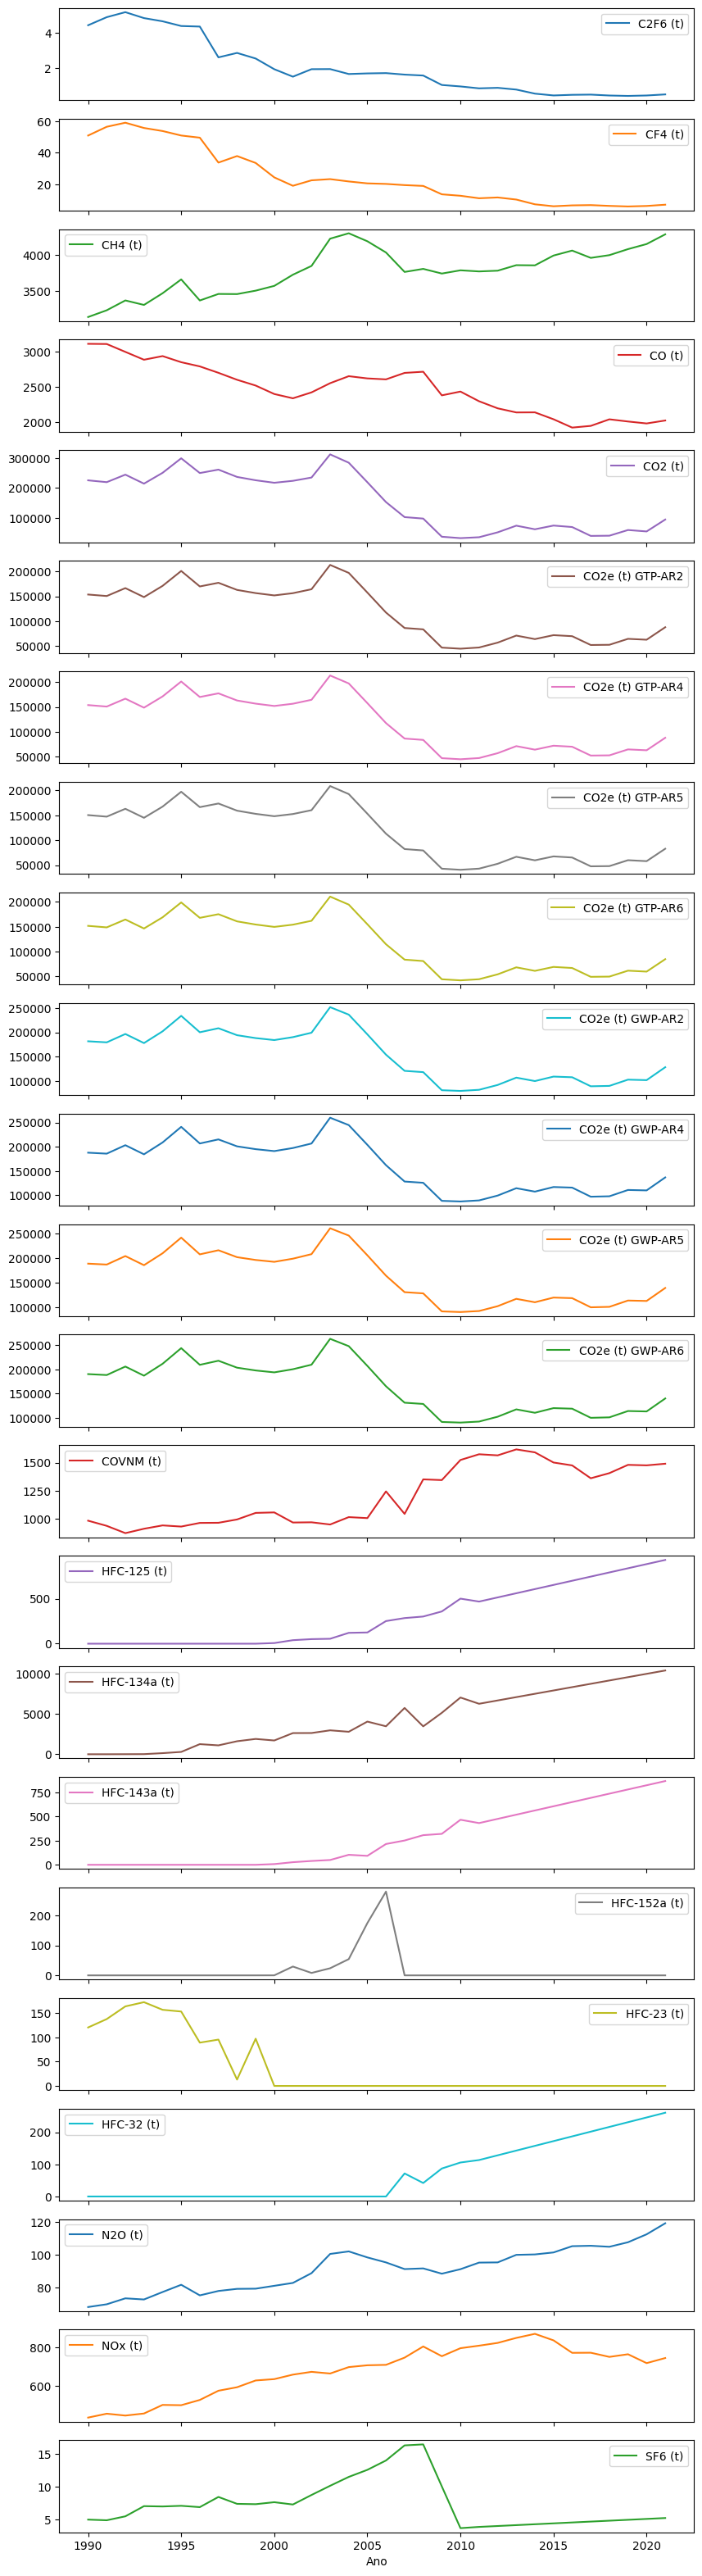

In [212]:
media_emissao_anual.plot(subplots=True,figsize=(10,40));

# média de emissão de 1990 até 2021 para cada tipo de gás da base de dados

### Desafio 3: Emissão por Setor Econômico

A equipe de supervisão deseja saber agora a média de emissão para cada um dos setores econômicos da coluna "Nível 1 - Setor". Como desafio, crie uma tabela de pivô e uma visualização gráfica contendo essas informações, utilizando apenas o método pivot_table para a construção da tabela, sem utilizar o método groupby.

In [213]:
emissao_setores = emissoes_por_ano.pivot_table(values = 'Emissão', index = 'Ano', columns = 'Setor', aggfunc = 'mean')
emissao_setores

Setor,Agropecuária,Energia,Mudança de Uso da Terra e Floresta,Processos Industriais,Resíduos
Ano,,,,,
1990,37303.179707,32252.883084,494153.860258,403812.825471,35407.977842
1991,38840.275782,33148.682301,477392.477812,454541.414118,36967.267804
1992,38895.923244,33479.520632,539951.263398,443130.433481,38478.761192
1993,38499.869153,34332.602012,465866.826575,475731.451887,40140.971514
1994,38798.768188,36456.339863,549051.792173,480314.099048,42158.544264
1995,36936.910657,38636.201974,662097.383605,505390.987361,44526.252540
1996,29179.545539,41788.580133,537599.235263,523731.239953,47048.535539
1997,27615.832563,45400.190369,559342.268069,534797.627569,49288.333805
1998,25623.401848,46805.597858,501591.981109,553244.676584,51972.866802


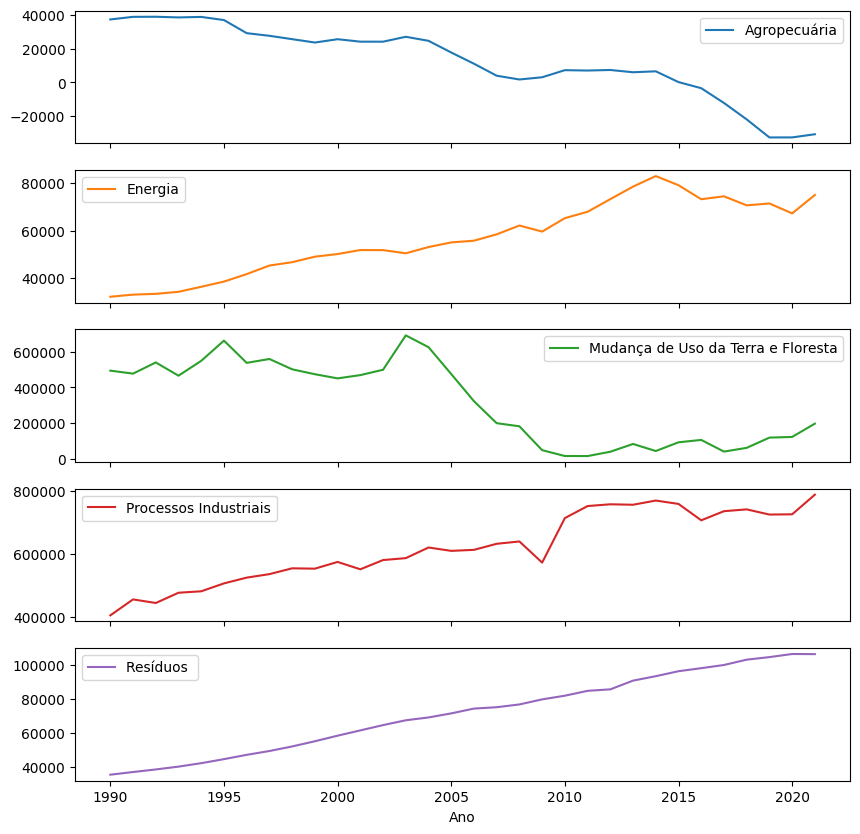

In [214]:
emissao_setores.plot(subplots = True, figsize = (10,10));

### Desafio 4


1. Faça um agrupamento de dados com as colunas "Estado" e "Nível 1 - Setor", obtendo a soma de emissão e armazenando o resultado em uma tabela.



In [215]:
emissoes_estados_setor = emissoes_por_ano.groupby(['Estado', 'Setor'])[['Emissão']].sum()

2. Utilizando a tabela construída na atividade 1, selecione os dados referentes à "Energia" do índice "Setor".

In [216]:
emissoes_estados_setor.xs('Energia', level = 1)

,Emissão
Estado,
AC,1.923401e+08
AL,5.398987e+08
AM,1.766284e+09
AP,2.499281e+08
BA,4.302791e+09
CE,1.741097e+09
DF,8.948850e+08
ES,1.959869e+09
GO,2.497175e+09


Explicação: Para selecionar um elemento de um DataFrame multi index, podemos usar o método cross-section, identificando o nível hierárquico do índice que estamos buscando. No caso, "Energia" é um valor do índice "Nível 1 - Setor" que ocupa o level 1 de hierarquia no DataFrame:

3. Utilizando a tabela construída na atividade 1, encontre a atividade econômica com valor máximo de emissão do Estado de Minas Gerais

In [217]:
emissoes_estados_setor.xs('MG', level = 0).idxmax()

Emissão    Energia
dtype: object

4. Obtenha uma tabela contendo a atividade econômica com máxima emissão para cada Estado.

In [218]:
emissoes_estados_setor = emissoes_por_ano.groupby(['Estado', 'Setor'])[['Emissão']].sum()
emissoes_estados_setor.groupby(level = 0).idxmax()

,Emissão
Estado,
AC,"(AC, Mudança de Uso da Terra e Floresta)"
AL,"(AL, Energia)"
AM,"(AM, Energia)"
AP,"(AP, Energia)"
BA,"(BA, Mudança de Uso da Terra e Floresta)"
CE,"(CE, Energia)"
DF,"(DF, Energia)"
ES,"(ES, Processos Industriais)"
GO,"(GO, Mudança de Uso da Terra e Floresta)"


5. Obtenha uma tabela contendo o Estado com máxima emissão para cada atividade econômica.

In [219]:
emissoes_estados_setor.groupby(level=1).idxmax()

,Emissão
Setor,
Agropecuária,"(RS, Agropecuária)"
Energia,"(SP, Energia)"
Mudança de Uso da Terra e Floresta,"(MT, Mudança de Uso da Terra e Floresta)"
Processos Industriais,"(NA, Processos Industriais)"
Resíduos,"(SP, Resíduos )"


### População dos estados

Vamos realizar a importação de uma nova base de dados com a informação da população de cada estado do Brasil, para posteriormente encontrarmos a emissão per capita de cada estado.

ℹ
Os dados foram obtidos através do [censo do IBGE](https://www.ibge.gov.br/estatisticas/sociais/saude/22827-censo-demografico-2022.html?=&t=resultados)

In [220]:
populacao_estados = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/POP2022_Municipios.xls', header=1, skipfooter=34)
populacao_estados

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
0,RO,11,15,Alta Floresta D'Oeste,21558
1,RO,11,23,Ariquemes,100896
2,RO,11,31,Cabixi,5107
3,RO,11,49,Cacoal,92202
4,RO,11,56,Cerejeiras,15237
...,...,...,...,...,...
5565,GO,52,22005,Vianópolis,14046
5566,GO,52,22054,Vicentinópolis,8776
5567,GO,52,22203,Vila Boa,3686
5568,GO,52,22302,Vila Propício,5646


Como as informações são referentes aos municípios, vamos realizar uma agregação com base na coluna estado.

In [221]:
# agrupamento por estado

populacao_estados.groupby('UF').sum(numeric_only=True)

,COD. UF,COD. MUNIC
UF,,
AC,264,7719
AL,2754,487914
AM,806,134451
AP,256,5908
BA,12093,7151757
CE,4232,1295156
DF,53,108
ES,2496,226710
GO,12792,2788737


Percebemos que a informação da população não foi agregada, portanto será necessário algum tratamento nessa coluna para retornar devidamente os dados.

In [222]:
# populacao_estados['POPULAÇÃO'].astype(int)

In [223]:
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na=False)]

# se encontrarmos um valor nulo, ele será substituído para False

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO
16,RO,11,205,Porto Velho,461.748(1)
74,AM,13,29,Alvarães,15.916(2)
81,AM,13,409,Barcelos,18.399(3)
83,AM,13,607,Benjamin Constant,37.436(4)
87,AM,13,805,Borba,33.209(5)
88,AM,13,839,Caapiranga,13.851(6)
97,AM,13,1605,Fonte Boa,27.692(7)
98,AM,13,1654,Guajará,13.809(8)
99,AM,13,1704,Humaitá,59.504(9)
103,AM,13,1951,Itamarati,10.783(10)


In [224]:
# remover os parênteses e o ponto de milhar

populacao_estados = populacao_estados.assign()

In [225]:
populacao_estados = populacao_estados.assign(populacao_sem_parenteses = populacao_estados['POPULAÇÃO'].replace('\(\d{1,2}\)', '', regex = True),
                                             populacao = lambda x : x.loc[:, 'populacao_sem_parenteses'].replace('\.', '', regex = True))

In [226]:
populacao_estados[populacao_estados['POPULAÇÃO'].str.contains('\(', na=False)]

,UF,COD. UF,COD. MUNIC,NOME DO MUNICÍPIO,POPULAÇÃO,populacao_sem_parenteses,populacao
16,RO,11,205,Porto Velho,461.748(1),461.748,461748
74,AM,13,29,Alvarães,15.916(2),15.916,15916
81,AM,13,409,Barcelos,18.399(3),18.399,18399
83,AM,13,607,Benjamin Constant,37.436(4),37.436,37436
87,AM,13,805,Borba,33.209(5),33.209,33209
88,AM,13,839,Caapiranga,13.851(6),13.851,13851
97,AM,13,1605,Fonte Boa,27.692(7),27.692,27692
98,AM,13,1654,Guajará,13.809(8),13.809,13809
99,AM,13,1704,Humaitá,59.504(9),59.504,59504
103,AM,13,1951,Itamarati,10.783(10),10.783,10783


In [227]:
populacao_estados = populacao_estados.astype({'populacao':'int64'})

Essa variável vai ser igual à populacao_estados.groupby() para agrupar a partir da coluna UF. Como vamos selecionar somente a nova coluna que transformamos em valor numérico, escrevemos populacao entre colchetes duplos. Por fim, fazemos o .sum() para somar esses valores.

Em seguida, vamos resetar o índice do dataframe. Quando criamos o groupby('UF'), o índice do dataframe se torna o nome dos estados. Mas, como queremos que ele se torne uma coluna, vamos passar .reset_index().

In [228]:
populacao_estados = populacao_estados.groupby('UF')[['populacao']].sum().reset_index()
populacao_estados

,UF,populacao
0,AC,829780
1,AL,3125254
2,AM,3952262
3,AP,774268
4,BA,14659023
5,CE,8936431
6,DF,2923369
7,ES,3975100
8,GO,6950976
9,MA,6800605


### Unindo os dados

Com as informações tratadas, podemos realizar a junção dos dados de emissão com a população, com uso do método [`merge()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).

In [229]:
emissao_estados = emissoes_por_ano[emissoes_por_ano['Ano'] == 2021].groupby('Estado')[['Emissão']].sum().reset_index()
emissao_estados

,Estado,Emissão
0,AC,1.577351e+08
1,AL,4.094839e+07
2,AM,-3.712929e+08
3,AP,-1.471514e+08
4,BA,1.112686e+08
5,CE,1.317279e+08
6,DF,5.119711e+07
7,ES,2.150910e+08
8,GO,1.553998e+08
9,MA,4.868090e+08


In [230]:
dados_agrupados = pd.merge(emissao_estados, populacao_estados, left_on = 'Estado', right_on = 'UF')
dados_agrupados

,Estado,Emissão,UF,populacao
0,AC,1.577351e+08,AC,829780
1,AL,4.094839e+07,AL,3125254
2,AM,-3.712929e+08,AM,3952262
3,AP,-1.471514e+08,AP,774268
4,BA,1.112686e+08,BA,14659023
5,CE,1.317279e+08,CE,8936431
6,DF,5.119711e+07,DF,2923369
7,ES,2.150910e+08,ES,3975100
8,GO,1.553998e+08,GO,6950976
9,MA,4.868090e+08,MA,6800605


Vamos verificar se há algum indício de se a emissão aumenta conforme o tamanho da população.

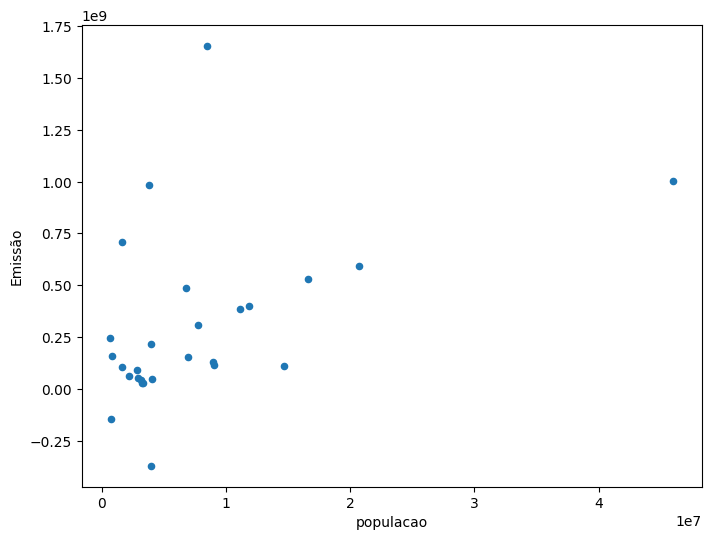

In [231]:
dados_agrupados.plot(x = 'populacao', y= 'Emissão', kind = 'scatter', figsize=(8,6));

Se quisermos saber a informação de cada estado nos pontos do gráfico, podemos utilizar uma outra biblioteca para obter um gráfico mais elaborado.

In [232]:
import plotly.express as px

In [233]:
px.scatter(data_frame = dados_agrupados, x = 'populacao', y = 'Emissão', text = 'Estado', opacity = 0)

Para obtermos a emissão per capita, criaremos uma nova coluna com a divisão dos valores de emissão pela população de cada estado.

In [234]:
dados_agrupados = dados_agrupados.assign(emissao_per_capita = dados_agrupados['Emissão']/dados_agrupados['populacao']).sort_values('emissao_per_capita', ascending = False)
dados_agrupados

,Estado,Emissão,UF,populacao,emissao_per_capita
20,RO,7.085629e+08,RO,1616379,438.364325
21,RR,2.442959e+08,RR,634805,384.836054
12,MT,9.846201e+08,MT,3784239,260.189716
13,PA,1.656512e+09,PA,8442962,196.200383
0,AC,1.577351e+08,AC,829780,190.092658
9,MA,4.868090e+08,MA,6800605,71.583186
26,TO,1.054228e+08,TO,1584306,66.541963
7,ES,2.150910e+08,ES,3975100,54.109587
23,SC,3.077161e+08,SC,7762154,39.643127
22,RS,3.858068e+08,RS,11088065,34.794786


In [235]:
px.bar(data_frame = dados_agrupados, x = 'Estado', y = 'emissao_per_capita')

In [239]:
dados_agrupados['emissao_per_capita'] = dados_agrupados['emissao_per_capita'].apply(lambda x: max(0, x)) # removendo dados negativos para plotar gráfico

px.scatter(data_frame=dados_agrupados, x='populacao', y='Emissão', text='Estado', size='emissao_per_capita')